In [7]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(
    r'C:\Users\25492\Desktop\2024年第四届长三角高校数学建模竞赛赛题\2024长三角选题B：人工智能范式的物理化学家\data.csv')
data

,id,class,y1,y2,y3,x1,x2,x3,x4,x5,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,1,2,-587.360784,-0.331308,0.018453,0.136518,0.000059,0.349761,-587.313385,68.127640,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.325400,2204.278945,21606.405010,16746.254820,213.098000
1,2,2,-587.359946,-0.329316,0.020334,0.135966,0.000060,0.349651,-587.313067,68.406902,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.769380,2076.587979,17602.163970,2199.601888,506.651409
2,3,2,-587.366330,-0.324781,0.024104,0.136758,0.000058,0.348885,-587.319604,67.688007,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.248220,497.946181,16759.458980,17687.268850,575.511247
3,4,1,-534.430563,-0.323772,0.076703,0.166028,0.000058,0.400475,-534.384191,66.933953,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.522100,2518.506658,37359.799660,5784.140268,530.878047
4,5,2,-838.152165,-0.323753,-0.038820,0.169158,0.000067,0.284934,-838.102038,90.368137,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.776720,2971.889099,36697.285060,17496.357370,640.112190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,1,-419.504748,-0.152722,-0.025667,0.169241,0.000055,0.127055,-419.459364,79.538702,...,63.361697,39.151228,94.862755,1968.900543,501.442536,14489.037340,1554.543619,26717.867000,6227.496125,548.720052
199996,199997,1,-419.494291,-0.152693,-0.018547,0.168173,0.000059,0.134146,-419.448829,78.753240,...,110.211710,0.088873,139.355293,1608.385691,1017.910470,19022.048140,2359.630960,22182.780890,19762.010290,194.794578
199997,199998,2,-406.836695,-0.152680,-0.041361,0.233604,0.000067,0.111320,-406.786417,108.276082,...,13.798549,37.889274,828.723926,2080.905500,776.676895,11712.821270,2686.690842,3036.807908,2058.707100,474.257489
199998,199999,1,-440.592967,-0.152678,-0.008569,0.180136,0.000060,0.144109,-440.548209,76.762032,...,29.168705,15.882359,654.330446,620.222337,2396.827918,6858.319928,1065.978203,9818.305268,6949.049915,502.028596


In [3]:
X = data.iloc[:, 5:]
Y = data.iloc[:, 2]
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,0.136518,0.000059,0.349761,-587.313385,68.127640,-587.323859,-587.312441,3.690374,1578.326219,259.236613,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.325400,2204.278945,21606.405010,16746.254820,213.098000
1,0.135966,0.000060,0.349651,-587.313067,68.406902,-587.323542,-587.312123,3.720941,1422.590010,39.474211,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.769380,2076.587979,17602.163970,2199.601888,506.651409
2,0.136758,0.000058,0.348885,-587.319604,67.688007,-587.329854,-587.318660,3.111271,1702.112816,887.859456,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.248220,497.946181,16759.458980,17687.268850,575.511247
3,0.166028,0.000058,0.400475,-534.384191,66.933953,-534.394372,-534.383246,2.187990,1432.356648,33.815618,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.522100,2518.506658,37359.799660,5784.140268,530.878047
4,0.169158,0.000067,0.284934,-838.102038,90.368137,-838.113854,-838.101093,4.485350,1871.002915,225.397080,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.776720,2971.889099,36697.285060,17496.357370,640.112190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.169241,0.000055,0.127055,-419.459364,79.538702,-419.468874,-419.458420,3.991411,1364.165906,840.027189,...,63.361697,39.151228,94.862755,1968.900543,501.442536,14489.037340,1554.543619,26717.867000,6227.496125,548.720052
199996,0.168173,0.000059,0.134146,-419.448829,78.753240,-419.458752,-419.447884,5.784022,1296.958436,646.581933,...,110.211710,0.088873,139.355293,1608.385691,1017.910470,19022.048140,2359.630960,22182.780890,19762.010290,194.794578
199997,0.233604,0.000067,0.111320,-406.786417,108.276082,-406.797683,-406.785473,1.670824,2129.572047,371.421698,...,13.798549,37.889274,828.723926,2080.905500,776.676895,11712.821270,2686.690842,3036.807908,2058.707100,474.257489
199998,0.180136,0.000060,0.144109,-440.548209,76.762032,-440.558158,-440.547265,4.513365,1157.687053,323.882553,...,29.168705,15.882359,654.330446,620.222337,2396.827918,6858.319928,1065.978203,9818.305268,6949.049915,502.028596


In [43]:
n = X.shape[1] - 1
S = np.zeros((n, 2))
P = np.zeros((n, 2))
for i in range(n):
    S[i, 0]= np.abs(stats.spearmanr(X.iloc[:, i], Y)[0])  # 斯皮尔曼相关系数
    S[i, 1] = stats.spearmanr(X.iloc[:, i], Y)[1]  # 斯皮尔曼p值

In [44]:
# 斯皮尔曼系数处理
S = pd.DataFrame(S, columns=['correlation', 'p_value'])
S = S[S['p_value'] <= 0.05]  # 只选择置信度小于0.05的指标
S = S.sort_values(by=['correlation'],ascending=False) # 进行排序
print(S)
#S.to_csv('斯皮尔曼.csv')

    correlation   p_value
5      1.000000  0.000000
3      0.999999  0.000000
6      0.999999  0.000000
8      0.413150  0.000000
7      0.285593  0.000000
0      0.218948  0.000000
1      0.182706  0.000000
2      0.126111  0.000000
4      0.119146  0.000000
22     0.007838  0.000456
82     0.005829  0.009135
66     0.005601  0.012244
20     0.005148  0.021332
77     0.004699  0.035598
40     0.004664  0.036990
23     0.004520  0.043246
11     0.004447  0.046707
95     0.004399  0.049128
36     0.004387  0.049752


In [45]:
# 选取斯皮尔曼相关系数置信度小于0.05
index = S.index
X = X.iloc[:,index]
X

,x6,x4,x7,x9,x8,x1,x2,x3,x5,x23,x83,x67,x21,x78,x41,x24,x12,x96,x37
0,-587.323859,-587.313385,-587.312441,1578.326219,3.690374,0.136518,0.000059,0.349761,68.127640,14376.080930,497288.18190,8689.035346,6471.754663,2704.470183,13050.352300,38636.897070,818.810145,28259.325400,57374.616650
1,-587.323542,-587.313067,-587.312123,1422.590010,3.720941,0.135966,0.000060,0.349651,68.406902,5703.094391,47114.24617,6995.930820,1388.128549,5261.348459,5214.111614,34194.803860,2339.742133,19185.769380,46184.930470
2,-587.329854,-587.319604,-587.318660,1702.112816,3.111271,0.136758,0.000058,0.348885,67.688007,14229.442550,304645.89840,5529.940922,6421.944296,92.434433,8381.078268,22280.649520,1176.654590,10780.248220,52250.167360
3,-534.394372,-534.384191,-534.383246,1432.356648,2.187990,0.166028,0.000058,0.400475,66.933953,14865.618630,495732.95310,1296.067918,559.293062,1739.766167,1463.728049,12795.907860,2677.527442,7180.522100,41298.046860
4,-838.113854,-838.102038,-838.101093,1871.002915,4.485350,0.169158,0.000067,0.284934,90.368137,7678.496056,388530.32900,8289.621204,2366.440224,1416.862785,2514.227942,43273.067760,828.081664,24619.776720,7268.783477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-419.468874,-419.459364,-419.458420,1364.165906,3.991411,0.169241,0.000055,0.127055,79.538702,13677.104380,386642.64350,6787.493523,4049.680708,3061.848318,1586.211814,42625.811620,2062.615170,14489.037340,13982.650680
199996,-419.458752,-419.448829,-419.447884,1296.958436,5.784022,0.168173,0.000059,0.134146,78.753240,11699.031260,466589.53230,2888.327882,1020.230923,3478.787129,505.499059,25675.424010,402.108387,19022.048140,64201.468110
199997,-406.797683,-406.786417,-406.785473,2129.572047,1.670824,0.233604,0.000067,0.111320,108.276082,5574.152770,306276.13100,1758.326376,745.606280,1786.686177,9654.260872,41367.220070,96.280409,11712.821270,13373.361630
199998,-440.558158,-440.548209,-440.547265,1157.687053,4.513365,0.180136,0.000060,0.144109,76.762032,3006.882121,128717.81130,2069.506399,6187.447585,4067.763932,2967.314189,24369.212800,2393.395449,6858.319928,29304.682030


In [46]:

# 数据预处理：标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 
# 使用LassoCV自带正则化路径长度和路径中的alpha个数来自动建立alpha选择的范围
ls_ = LassoCV(eps=0.0001,n_alphas=300,cv=5).fit(X_scaled,Y)
# 查看最佳alpha
b_alpha = ls_.alpha_
print(b_alpha)
# 查看是否有自动生成的alpha取值
print(ls_.alphas_.shape) # (300,)
# 可以查看哪些特征的系数被压缩到零，实现了特征选择
non_zero_coef_indices = np.abs(ls_.coef_) != 0
selected_features = np.arange(X.shape[1])[non_zero_coef_indices]
print("Selected Features (indices): ", selected_features)
 
# 输出系数
coef = ls_.coef_
print("Lasso Coefficients: ", coef)


0.012540922298079491
(300,)
Selected Features (indices):  [0]
Lasso Coefficients:  [125.39668206   0.           0.          -0.          -0.
   0.          -0.           0.          -0.           0.
   0.           0.          -0.           0.          -0.
  -0.           0.          -0.          -0.        ]


In [41]:
lasso.coef_

array([125.39922298,   0.        ,   0.        ,  -0.        ,
        -0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ])

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


32720     1.621278
42698     1.632769
44249     1.614270
47346     1.729397
49287     1.621401
50968     1.588593
60318     1.608719
99112     1.666265
128099    1.621999
129226    1.586220
134643    1.616728
142347    1.632309
143042    1.548088
149335    1.650201
155112    1.656848
157318    1.742870
161148    1.693763
165249    1.569967
167257    1.654601
185247    1.644115
dtype: float64


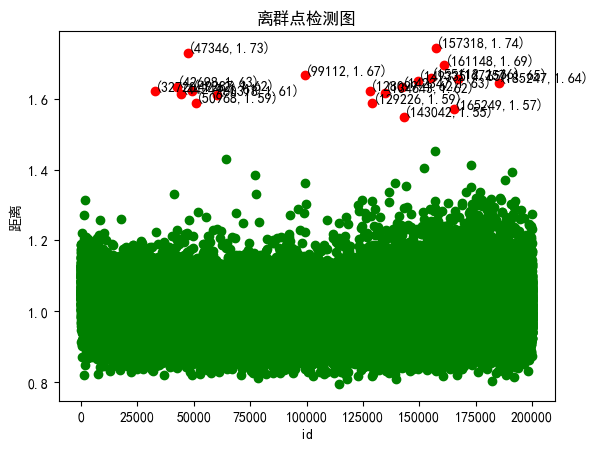

In [15]:
from sklearn.cluster import KMeans

#参数初始化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:,1:])
data_scaled = pd.DataFrame(data_scaled,columns=data.columns[1:])
k = 5 #聚类的类别
threshold = 1.5 #离散点阈值
iteration = 500 #聚类最大循环次数
model = KMeans(n_clusters=k)
model.fit(data_scaled)
res = pd.concat([data_scaled,pd.Series(model.labels_, index = data.index)],axis=1)#将分类结果加入到标准化数据中
res.columns = list(data_scaled.columns) + ['Cluster_id']
point = []
for i in range(k):
    tmp = res.loc[res['Cluster_id'] == i, res.columns[:-1]]-model.cluster_centers_[i] #将当前聚类的数据减去聚类中心点坐标
    tmp = tmp.apply(np.linalg.norm,axis=1) #求取绝对距离
    point.append(tmp/tmp.median())  # 求对于中位数的相对距离
point = pd.concat(point) #将所有聚簇合并

#以下为绘制点图
point[point<=threshold].plot(style='go')#正常点
discrete_point = point[point>threshold]#离群点
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
discrete_point.plot(style='ro')
print(discrete_point)
for i in range(len(discrete_point)):#对离群点标注坐标
    id = discrete_point.index[i]
    value = discrete_point.iloc[i]
    plt.annotate('(%s,%.2f)'%(id,value),xy=(id,value))
plt.xlabel('id')
plt.ylabel('距离')
plt.title('离群点检测图')
plt.savefig('离群点检测.png')
plt.show()

In [16]:
from scipy.spatial.distance import cdist
K=range(1,10)
sse_result=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    sse_result.append(sum(np.min(cdist(data_scaled,kmeans.cluster_centers_,'euclidean'),axis=1))/data_scaled.shape[0])


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

NameError: name 'Falseplt' is not defined

<Figure size 640x480 with 0 Axes>

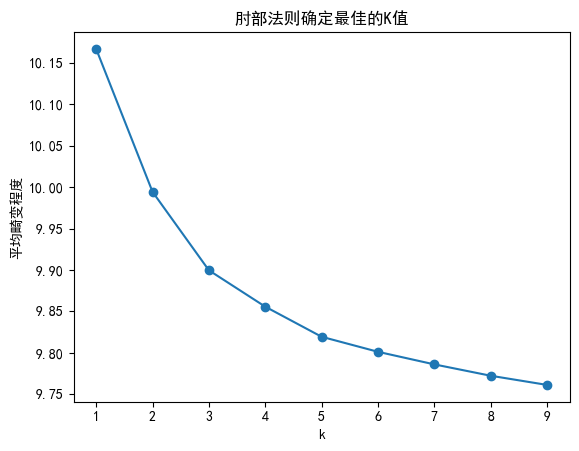

In [18]:
plt.figure()
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.plot(K,sse_result, marker='o')
plt.xlabel('k')
plt.ylabel(u'平均畸变程度')
plt.title(u'肘部法则确定最佳的K值')
plt.savefig('肘部法则确定最佳的K值.png')
plt.show()